### EDA and Data Cleaning

Let's begin by importing the necessary libraries and examining our data.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import data
content_df = pd.read_csv('data/Content.csv', index_col = 0)
content_df.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [3]:
# check data description
content_df.describe()

,Content ID,User ID,Type,Category,URL
count,1000,1000,1000,1000,801
unique,1000,446,4,41,801
top,97522e57-d9ab-4bd6-97bf-c24d952602d2,72d2587e-8fae-4626-a73d-352e6465ba0f,photo,technology,https://socialbuzz.cdn.com/content/storage/975...
freq,1,8,261,71,1


In [4]:
# check data info
content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
 4   URL         801 non-null    object
dtypes: object(5)
memory usage: 46.9+ KB


We won't need the User ID or URL columns for our analysis, so let's drop those. Then let's check the values in the category column to make sure they make sense given our data.

In [5]:
# drop unnecessary columns and check to make sure it worked
content_df.drop(axis = 1, labels = ['User ID', 'URL'], inplace = True)
content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   Type        1000 non-null   object
 2   Category    1000 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


In [6]:
# check values in Category column
content_df['Category'].value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

We'll need to clean up these categories by removing punctuation and capitalization.

In [7]:
# strip quote marks and lowercase all values
content_df['Category'] = content_df['Category'].apply(lambda x: x.strip('"').lower())

In [8]:
# check to make sure it worked
content_df['Category'].value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: Category, dtype: int64

Now that we've cleaned the values in this column, let's rename the Type column since we also have a column named "Type" in the Reactions and Reaction Types tables. Let's also make sure the values in that column look right.

In [9]:
# rename column and check values
content_df.rename(columns={"Type": "Content_Type"}, inplace = True)
content_df['Content_Type'].value_counts()

photo    261
video    259
GIF      244
audio    236
Name: Content_Type, dtype: int64

Great - now let's look at our second table, Reactions.

In [10]:
# import data
reactions_df = pd.read_csv('data/Reactions.csv', index_col = 0)
reactions_df.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [11]:
# check data description
reactions_df.describe()

,Content ID,User ID,Type,Datetime
count,25553,22534,24573,25553
unique,980,500,16,25542
top,4b2d0fff-3b4f-43ca-a7df-c430479cb9ba,c76c3393-88e2-47b0-ac37-dc4f2053f5a5,heart,2020-10-29 20:51:08
freq,49,65,1622,2


In [12]:
# check data info
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   User ID     22534 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    25553 non-null  object
dtypes: object(4)
memory usage: 998.2+ KB


Again, we can drop the User ID column. We'll also need to drop rows with missing values, and change the "Datetime" column to a datetime data type. Finally, we'll need to change the "Type" column name like we did for the Content table.

In [13]:
# drop user ID column
reactions_df.drop(axis = 1, labels = ['User ID'], inplace = True)

# convert dates to datetime
reactions_df['Datetime'] = pd.to_datetime(reactions_df['Datetime'])

# drop rows with missing values
reactions_df.dropna(inplace = True)

# rename column
reactions_df.rename(columns = {'Type':'Reaction_Type'}, inplace = True)

That looks good. Finally, let's look at the Reaction Types Table.

In [14]:
# import data
reactiontypes_df = pd.read_csv('data/ReactionTypes.csv', index_col = 0)
reactiontypes_df.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [15]:
# check data info
reactiontypes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


All we need to do for this one is rename the Type column to match the Reactions table.

In [16]:
# rename column
reactiontypes_df.rename(columns = {'Type':'Reaction_Type'}, inplace = True)
reactiontypes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reaction_Type  16 non-null     object
 1   Sentiment      16 non-null     object
 2   Score          16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


It looks like our data is clean, based on the client's specifications (remove rows with missing values, drop unnecessary colunmns, and ensure data types match the column values).

### Creating a joined table for analysis
In order to answer the business question for this project, we'll need to join the information from these tables into one. We can use the Reactions table as our base and build from there. 

Let's start by adding the information from the content table to our new Dataframe. We'll need to join them based on Content ID, since that's the column they have in common.

In [75]:
# merge tables on content ID column
top_performers = reactions_df.merge(content_df, on = 'Content ID')
top_performers

,Content ID,Reaction_Type,Datetime,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


Next, let's add the columns from the Reaction Types table into the Reactions table.

In [76]:
# merge tables on reaction type column
top_performers = top_performers.merge(reactiontypes_df, on = 'Reaction_Type')
top_performers

,Content ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72


Great - we have over 24,500 rows of data. Let's use this table to answer our business question regarding the top five categories with the largest aggregate popularity.

### Top Categories Analysis
The measure of popularity provided to us by the client is the "Score" column. To find the highest aggregate popularity for each category, we simply have to sum this value by category.

In [77]:
# group by category and calculate total score
top_five = top_performers.groupby('Category').sum().sort_values(by='Score', ascending = False)
top_five

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676
culture,66579
travel,64880
cooking,64756
soccer,57783


There's our answer - the top five categories by aggregate popularity are **animals, science, healthy eating, technology, and food.** We can export this cleaned dataset to a CSV to share with the client.

In [20]:
# Create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('client_data.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object
top_performers.to_excel(writer, sheet_name='Cleaned Data')
top_five.to_excel(writer, sheet_name='Top Five Categories')

# Close the Pandas Excel writer and output the Excel file
writer.close()

### Visualizations
Let's start by visualizing the popularity of each category.

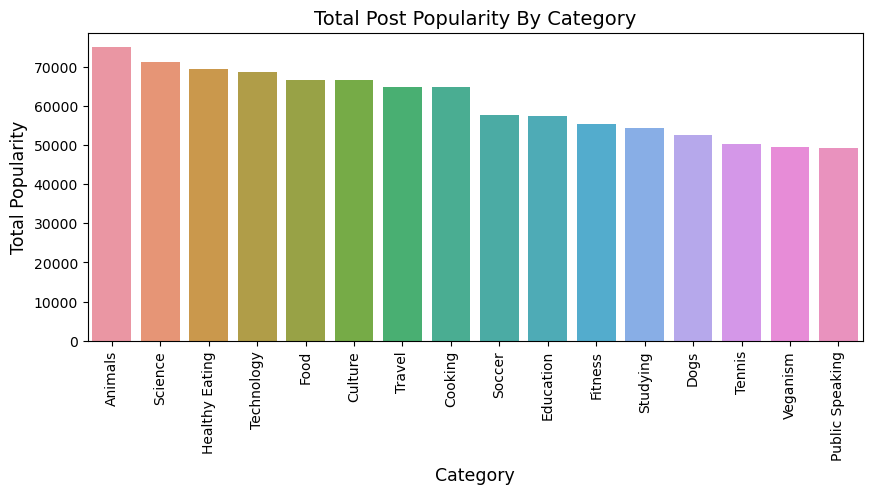

In [21]:
# instantiate figure and axis
fig, ax = plt.subplots(figsize = (10, 4))

# create bar plot
sns.barplot(data = top_five, x = top_five.index.str.title(), y = top_five.Score)

# set title and axis labels
ax.set_title('Total Post Popularity By Category', fontsize = 14)
ax.set_xlabel('Category', fontsize = 12.5)
ax.set_ylabel('Total Popularity', fontsize = 12.5)
plt.xticks(rotation = 90)
plt.show;

Let's see if the order of categories changes at all if we examine average popularity instead of total popularity.

In [22]:
# group by category and calculate average score
top_performers_avg = top_performers.groupby('Category').mean(numeric_only = True).sort_values(by = 'Score', ascending = False)
top_performers_avg

,Score
Category,
technology,40.481743
public speaking,40.479869
healthy eating,40.383809
education,40.080949
studying,39.815847
veganism,39.758814
culture,39.724940
soccer,39.658888
fitness,39.658065


Interesting - while two out of the top five categories overlap, the other three are different! It also appears that on average, most posts perform within a point or two of each other. Let's graph this data as well.

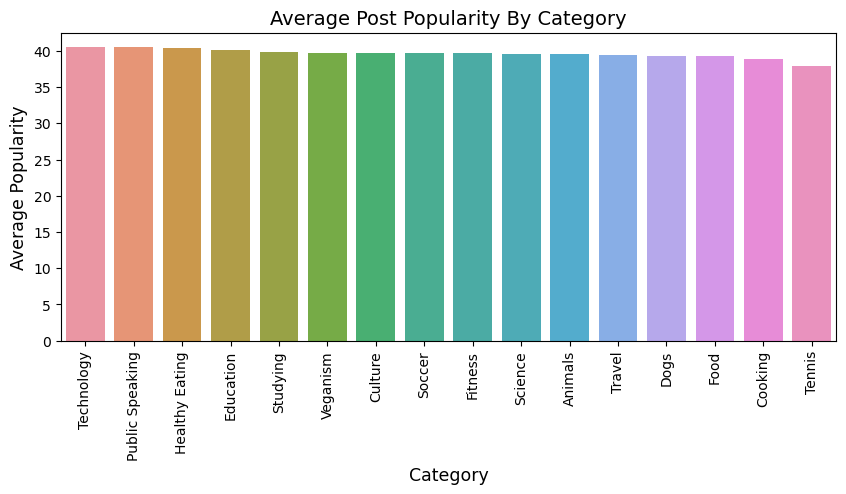

In [23]:
# instantiate figure
fig, ax = plt.subplots(figsize = (10, 4))

# create bar plot
sns.barplot(data = top_performers_avg, x = top_performers_avg.index.str.title(), y = top_performers_avg.Score)

# set title and axis labels
ax.set_title('Average Post Popularity By Category', fontsize = 14)
ax.set_xlabel('Category', fontsize = 12.5)
ax.set_ylabel('Average Popularity', fontsize = 12.5)
plt.xticks(rotation = 90)
plt.show;

Now let's see how post popularity changes over time. To do so, we'll need to group each category by its total popularity for each month in our data.

In [24]:
# extract month
top_performers['Month'] = top_performers['Datetime'].dt.to_period('M')

# sort from earliest month to latest
top_performers = top_performers.sort_values('Month')

# reset index
top_performers = top_performers.reset_index(drop = True)
top_performers

,Content ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score,Month
0,77b49477-2f3c-455a-b8f1-09ec2e553174,want,2020-06-30 14:41:35,video,cooking,positive,70,2020-06
1,e1b4a0fe-5069-4765-8170-ef44ab8f102c,heart,2020-06-24 06:55:27,photo,tennis,positive,60,2020-06
2,34a3747a-0b77-42f6-ae19-87c38b94b674,indifferent,2020-06-30 10:29:53,GIF,science,neutral,20,2020-06
3,da8f7258-6757-4a7e-892e-a16b925ef83b,like,2020-06-25 00:41:02,photo,cooking,positive,50,2020-06
4,b18cb63f-4c8e-44ee-a47f-541e95191d11,love,2020-06-30 01:14:13,photo,public speaking,positive,65,2020-06
...,...,...,...,...,...,...,...,...
24568,27ec2b21-a749-4181-b182-150a174fc277,scared,2021-06-10 09:02:47,GIF,animals,negative,15,2021-06
24569,bac28166-5b8d-4f5d-88da-8c8f9a1c3f5b,scared,2021-06-06 05:00:48,video,food,negative,15,2021-06
24570,baa2db00-81ba-4c34-b17d-dd950bfa133b,heart,2021-06-13 16:05:07,GIF,soccer,positive,60,2021-06
24571,c136ae25-d882-4e2c-b515-5727ad2626a5,heart,2021-06-05 19:50:32,photo,soccer,positive,60,2021-06


In [67]:
# group by month and calculate total score of all posts for that month
by_month = top_by_month.groupby('Month').sum()
by_month.reset_index(inplace = True)
by_month

,Month,Score
0,2020-06,12719
1,2020-07,29320
2,2020-08,30397
3,2020-09,28780
4,2020-10,30350
5,2020-11,30107
6,2020-12,27321
7,2021-01,28474
8,2021-02,27310
9,2021-03,27514


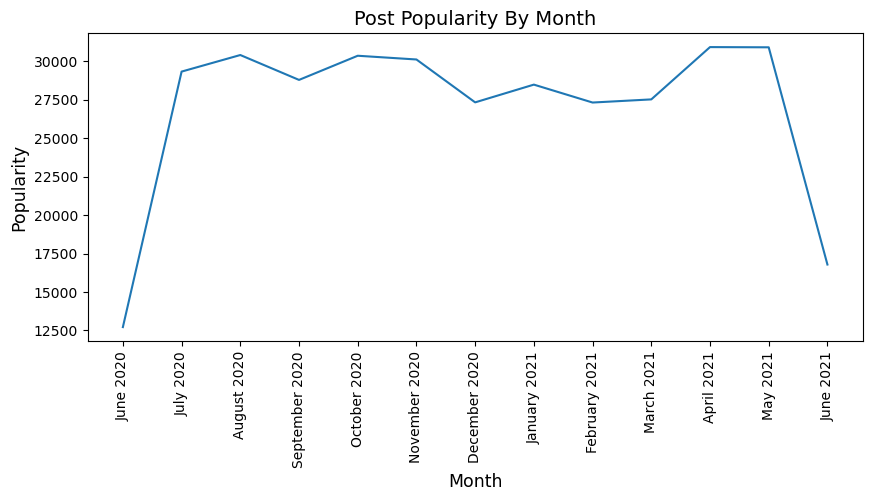

In [78]:
# instantiate figure and axis
fig, ax = plt.subplots(figsize = (10, 4))

# create line plot of total popularity by month
sns.lineplot(data=by_month, x=by_month['Month'].dt.strftime('%B %Y'), y='Score')

# set title and axis labels
ax.set_title('Post Popularity By Month', fontsize = 14)
ax.set_xlabel('Month', fontsize = 12.5)
ax.set_ylabel('Popularity', fontsize = 12.5)
plt.xticks(rotation = 90)
plt.show;

Let's see what post popularity looks like by month for each of the top five categories.

In [49]:
# create list of top five categories
top_five_cats = ['animals', 'science', 'healthy eating', 'technology', 'food']

# create dataframe showing total score by category for each month in our data
top_by_month = top_performers.loc[top_performers['Category'].isin(top_five_cats)]
top_by_month = top_by_month.groupby(['Month', 'Category']).sum()
top_by_month.reset_index(inplace = True)
top_by_month

,Month,Category,Score
0,2020-06,animals,3452
1,2020-06,food,1962
2,2020-06,healthy eating,2813
3,2020-06,science,2445
4,2020-06,technology,2047
...,...,...,...
60,2021-06,animals,3746
61,2021-06,food,2776
62,2021-06,healthy eating,3077
63,2021-06,science,3451


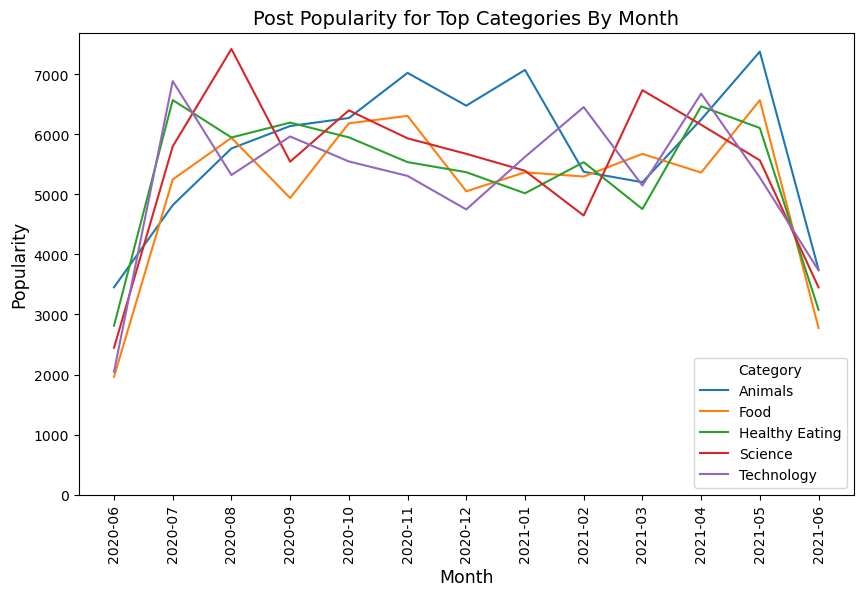

In [58]:
# instantiate figure
fig, ax = plt.subplots(figsize = (10, 6))

# create line plot of post popularity by month, hued by category
sns.lineplot(data=top_by_month, x=top_by_month['Month'].astype('str'), y='Score', hue=top_by_month.Category.str.title())

# set title and axis labels
ax.set_title('Post Popularity for Top Categories By Month', fontsize = 14)
ax.set_xlabel('Month', fontsize = 12.5)
ax.set_ylabel('Popularity', fontsize = 12.5)
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 8000, 1000))
plt.show;

Now we can use these visualizations in our presentation to the client.